In [1]:
import numpy as np
import pandas as pd
import nbimporter
import dynamicalModels as dynamicalModels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.tsatools import detrend
import statsmodels
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
from scipy.signal import csd, welch, detrend
from statsmodels.tsa.stattools import adfuller


Importing Jupyter notebook from dynamicalModels.ipynb


# Lorenz 96

In [ ]:
# these are our constants
N = 5  # number of variables
F = 8  # forcing
x0 = F*np.ones(N) # initial state (equilibrium)
x0[2] += 0.01 # add small perturbation to 20th variable
tinit = 0
tmax = 40.0
dt = 0.01

In [ ]:
lorenz96 = dynamicalModels.Lorenz96(N,F)
sol = lorenz96.integrate(tinit,tmax, dt ,x0)
lorenz96.trajectory_plot()
lorenz96.evolution_plot()

lorenz96_df = pd.DataFrame(data=(sol.y).T,    
                columns=['x0','x1','x2','x3','x4'])

In [ ]:
result = adfuller(lorenz96_df['x0'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

In [ ]:
result = adfuller(lorenz96_df['x1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(lorenz96_df['x2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(lorenz96_df['x3'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(lorenz96_df['x4'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Kuramoto Model

In [ ]:
# these are our constants
N = 3  # number of variables
K = 1 #coupling
omega =  np.array([3.07139979, 0.07936669, 2.63766864])   # natural frequency
theta0 = np.array([1.46606489, 1.66029349, 0.17308032]) # initial state 
tinit = 0.0
tmax = 200.0
dt =  0.01

In [ ]:
kuramoto = dynamicalModels.Kuramoto(N,K,omega)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
plt.plot(sol[0],(sol[1])[:,0])
plt.xlabel('$t$')
plt.ylabel('$x_0$')
plt.show()
plt.plot(sol[0],(sol[1])[:,1])
plt.xlabel('$t$')
plt.ylabel('$x_1$')
plt.show()
plt.plot(sol[0],(sol[1])[:,2])
plt.xlabel('$t$')
plt.ylabel('$x_2$')
plt.show()
kuramoto.evolution_plot()


In [ ]:
kuramoto_df = pd.DataFrame(data=sol[1],    
                columns=['x0','x1','x2'])

In [ ]:
result = adfuller(kuramoto_df['x0'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(kuramoto_df['x1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(kuramoto_df['x2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# X and Y positions

In [ ]:
result = adfuller(kuramoto_df.transform([np.cos, np.sin])['x0']['cos'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Noisy Kuramoto

In [2]:
# these are our constants
N = 3  # number of variables
K = 1 #coupling
omega =  np.array([3.07139979, 0.07936669, 2.63766864])   # natural frequency
theta0 = np.array([1.46606489, 1.66029349, 0.17308032]) # initial state 
tinit = 0.0
tmax = 250.0
sigma=2
dt =  0.01

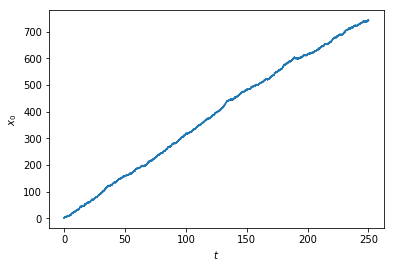

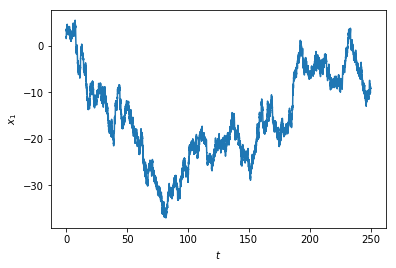

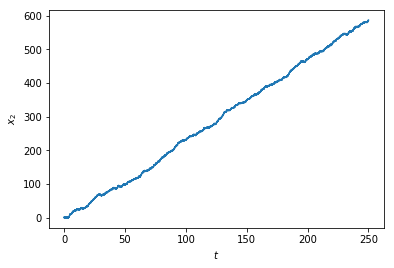

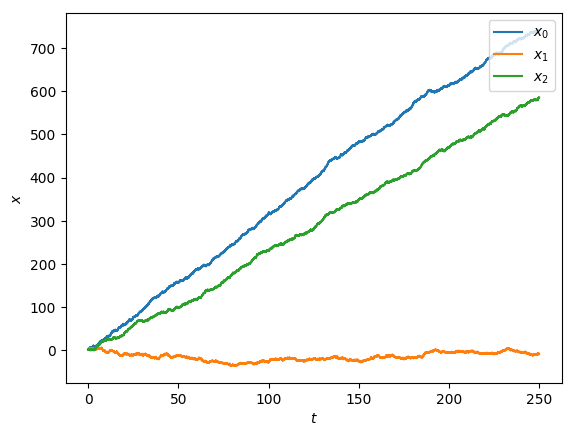

In [3]:
kuramoto = dynamicalModels.Kuramoto(N,K,omega,sigma)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
plt.plot(sol[0],(sol[1])[:,0])
plt.xlabel('$t$')
plt.ylabel('$x_0$')
plt.show()
plt.plot(sol[0],(sol[1])[:,1])
plt.xlabel('$t$')
plt.ylabel('$x_1$')
plt.show()
plt.plot(sol[0],(sol[1])[:,2])
plt.xlabel('$t$')
plt.ylabel('$x_2$')
plt.show()
kuramoto.evolution_plot()

In [8]:
kuramoto_noisy_df = pd.DataFrame(data=sol[1],    
                columns=['x0','x1','x2'])

In [5]:
result = adfuller(kuramoto_noisy_df['x0'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.730424
p-value: 0.415509
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:2535: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  coef, resids, rank, s = linalg.lstsq(A, newdata[sl])


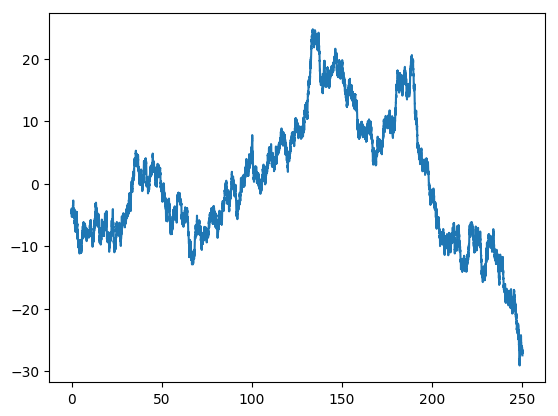

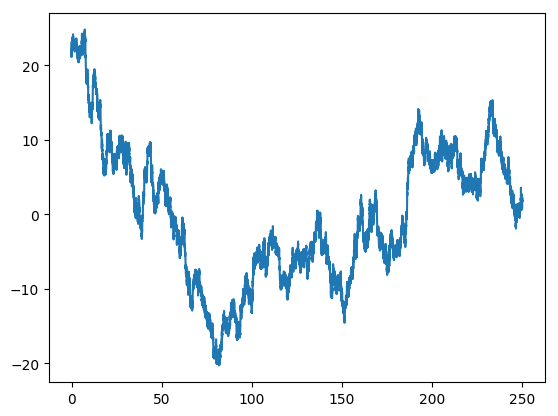

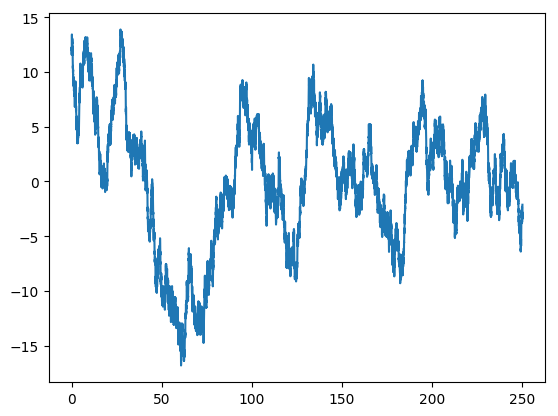

In [6]:
plt.plot(sol[0],detrend(kuramoto_noisy_df['x0']))
plt.show()
plt.clf
plt.plot(sol[0],detrend(kuramoto_noisy_df['x1']))
plt.show()
plt.plot(sol[0],detrend(kuramoto_noisy_df['x2']))
plt.show()

In [9]:
kuramoto_x0_detrend=detrend(kuramoto_noisy_df['x0'])
result = adfuller(kuramoto_x0_detrend)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.503685
p-value: 0.891295
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [10]:
kuramoto_x1_detrend=detrend(kuramoto_noisy_df['x1'])
result = adfuller(kuramoto_x1_detrend)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.476094
p-value: 0.121400
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [11]:
kuramoto_x2_detrend=detrend(kuramoto_noisy_df['x2'])
result = adfuller(kuramoto_x2_detrend)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.013020
p-value: 0.033696
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [13]:
kuramoto_noisy_df=kuramoto_noisy_df.transform([np.cos, np.sin])

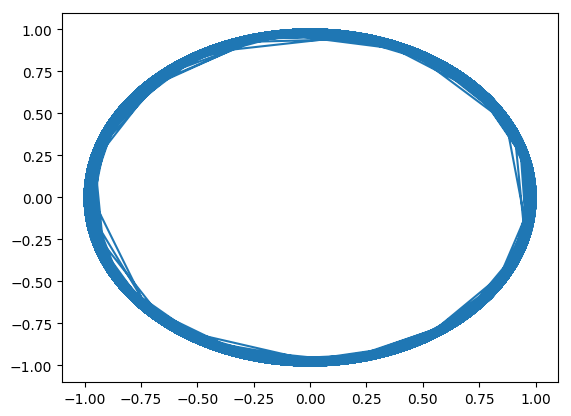

In [18]:
plt.cla()
plt.close()
plt.plot(kuramoto_noisy_df['x0']['cos'],kuramoto_noisy_df['x0']['sin'])
plt.show()

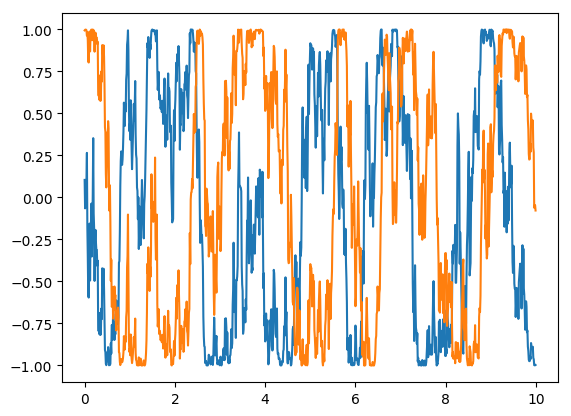

In [25]:
plt.cla()
plt.close()
plt.plot(sol[0][:1000],kuramoto_noisy_df['x0']['cos'][:1000])
plt.plot(sol[0][:1000],kuramoto_noisy_df['x0']['sin'][:1000])
plt.show()

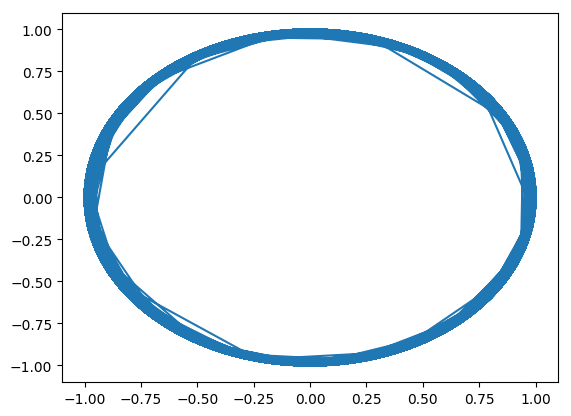

In [19]:
plt.cla()
plt.close()
plt.plot(kuramoto_noisy_df['x1']['cos'],kuramoto_noisy_df['x1']['sin'])
plt.show()

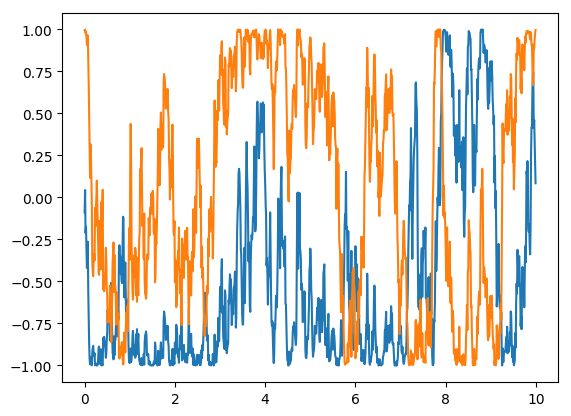

In [24]:
plt.cla()
plt.close()
plt.plot(sol[0][:1000],kuramoto_noisy_df['x1']['cos'][:1000])
plt.plot(sol[0][:1000],kuramoto_noisy_df['x1']['sin'][:1000])
plt.show()

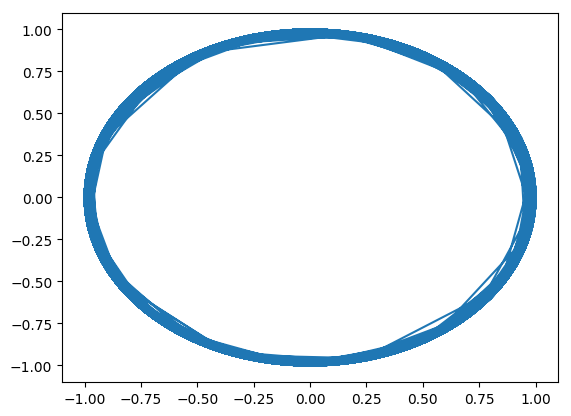

In [20]:
plt.cla()
plt.close()
plt.plot(kuramoto_noisy_df['x2']['cos'],kuramoto_noisy_df['x2']['sin'])
plt.show()

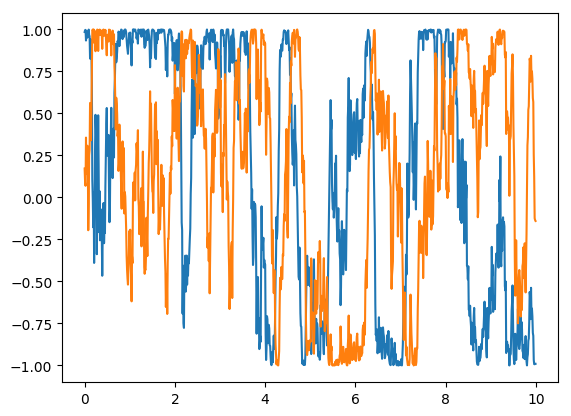

In [26]:
plt.cla()
plt.close()
plt.plot(sol[0][:1000],kuramoto_noisy_df['x2']['cos'][:1000])
plt.plot(sol[0][:1000],kuramoto_noisy_df['x2']['sin'][:1000])
plt.show()

# Wiener Process

In [ ]:
def a_fun(X):
    return (10-X)
def b_fun(X):
    return 1

sodes= dynamicalModels.sdes(a_fun,b_fun)
N=200
y = np.zeros([3,N])

for i in range(3): 
    x0 = (np.random.uniform(size=1)+10)
    out = sodes.euler_maruyama(tinit,x0,tmax,N)
    y[i,:] = out[1]
t = out[0]

plt.plot(t,y.T)
plt.show()

In [ ]:
wiener_df = pd.DataFrame(data=y.T,    
                columns=['x0','x1','x2'])

result = adfuller(wiener_df['x0'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

In [ ]:
result = adfuller(wiener_df['x1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

In [ ]:
result = adfuller(wiener_df['x2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Simple Enzymatic Reaction

In [ ]:
S = np.array([[-1, 1, 0, 0, 0, 0],
              [ 0, 0, 0, 0, 1, -1],
              [ 1,-1,-1, 1, 0, 0],
              [ 0, 0, 1,-1,-1, 1],
              [-1, 1, 0, 0, 1,-1]])
reaction_rates =np.array([1.0,1.0,2.0,1.0,1.0,1.0])
tinit = 0.0
tmax = 100.0
dt = 0.01

x0 = np.array([1.0,1.0,1.0,1.0,3.0])

In [ ]:
chemical_obj= dynamicalModels.enzymatic_reaction(S,reaction_rates)

sol = chemical_obj.integrate(tinit,tmax,dt,x0)
chemical_obj.evolution_plot()
chemical_obj.trajectory_plot()

In [ ]:
chem_det_df = pd.DataFrame(data=(sol.y).T,    
                columns=['X1','X2','X1E1','X2E1','E1'])

In [ ]:
result = adfuller(chem_det_df['X1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(chem_det_df['X2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(chem_det_df['X1E1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(chem_det_df['X2E1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(chem_det_df['E1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Simple Enzymatic Reaction with Gillespie Sampling

In [ ]:
S = np.array([[-1, 1, 0, 0, 0, 0],
              [ 0, 0, 0, 0, 1, -1],
              [ 1,-1,-1, 1, 0, 0],
              [ 0, 0, 1,-1,-1, 1],
              [-1, 1, 0, 0, 1,-1]])
reaction_rates =np.array([1.0,1.0,2.0,1.0,1.0,1.0])
tinit = 0.0
tmax = 100.0
dt = 0.01

x0 = np.array([1.0,1.0,1.0,1.0,1.0])

In [ ]:
chemical_obj= dynamicalModels.enzymatic_reaction(S,reaction_rates)
sol = chemical_obj.solve_markov_process(tinit,20.0,np.array([100.0,0.0,0.0,0.0,100.0]))
chemical_obj.evolution_plot()
chemical_obj.trajectory_plot()

In [ ]:
chem_det_df = pd.DataFrame(data=sol[1],    
                columns=['X1','X2','X1E1','X2E1','E1'])

In [ ]:
result = adfuller(chem_det_df['X1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(chem_det_df['X2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(chem_det_df['X1E1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(chem_det_df['X2E1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(chem_det_df['E1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Van der Pol Oscillator

In [ ]:
x0 = np.array([5.0, 5.0])
dt = 0.01
tmax = 100.0
vdp = dynamicalModels.van_der_pol(0.5)
sol = vdp.integrate(tinit,tmax,dt,x0)
vdp.evolution_plot()
vdp.trajectory_plot()

In [ ]:
vdp_df = pd.DataFrame(data=(sol.y).T,    
                columns=['x','dx'])

In [ ]:
result = adfuller(vdp_df['x'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(vdp_df['dx'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Duffing Oscillator

In [ ]:
x0 = np.array([1.0, 1.0])
dt = 0.01
tmax = 100.0
duff = dynamicalModels.duffing(1,5,0.02,8,0.5)
sol = duff.integrate(tinit,tmax,dt,x0)
duff.evolution_plot()
duff.trajectory_plot()

In [ ]:
duff_df = pd.DataFrame(data=(sol.y).T,    
                columns=['x','dx'])

In [ ]:
result = adfuller(vdp_df['x'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
result = adfuller(duff_df['dx'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))